In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose 





In [4]:
airline = pd.read_csv('ARIMA.csv')# put the path and filename
airline = pd.read_csv('ARIMA.csv', index_col ='month', parse_dates = True) 
airline.head()

C:\Users\Sushnato\AppData\Local\Temp\ipykernel_21392\2314522451.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airline = pd.read_csv('ARIMA.csv', index_col ='month', parse_dates = True)


,air
month,
2049-01-01,112
2049-02-01,118
2049-03-01,132
2049-04-01,129
2049-05-01,121


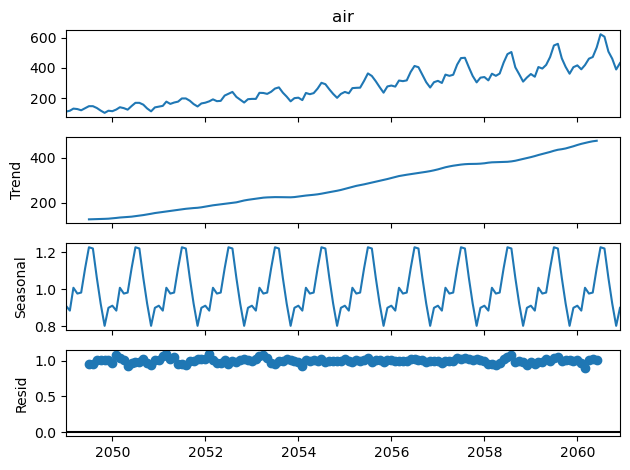

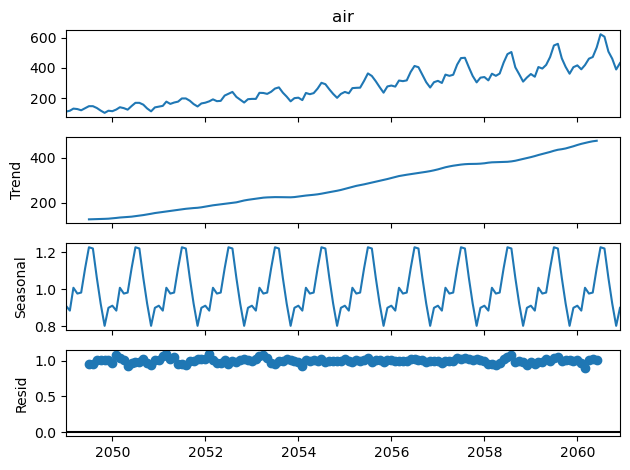

In [5]:
#to decompose teh data into seasonal, residuals ,noise ,trend
result = seasonal_decompose(airline['air'],  model ='multiplicative') 
result.plot()

In [6]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
#description of auto arima i will check here 
#https://alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html


In [7]:
stepwise_fit = auto_arima(airline['air'], start_p = 1, start_q = 1, 
max_p = 8, max_q = 8, m = 12, start_P = 0, seasonal = True, 
 d = 1, D = 1, trace = True, error_action ='ignore',   
 suppress_warnings = True,   stepwise = True)         
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.17 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.27 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.33 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Thu, 03 Jul 2025   AIC                           1019.178
Time:                                     05:36:24   BIC                           1030.679
Sample:                                 01-01-2049   HQIC                          1023.851
                                      - 12-01-2060                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
#total airline datarows
len(airline)

# Split data into train / test sets 
train = airline.iloc[:132] 
len(train)
test = airline.iloc[132:] 
len(test)


12

In [15]:
# Fitting a SARIMAX(0, 1, 1)x(0, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['air'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, [], 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 air   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.830
Date:                             Thu, 03 Jul 2025   AIC                            901.659
Time:                                     05:45:30   BIC                            912.776
Sample:                                 01-01-2049   HQIC                           906.173
                                      - 12-01-2059                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2556      0.080     -3.190      0.001      -0.413      -0.099
ar.S.L12      -0.0962      0.090     -1.073      0.283      -0.272       0.080
ar.S.L24       0.1454      0.101      1.445      0.149      -0.052       0.343
sigma2       106.2408     15.243      6.970      0.000      76.364     136.117
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
predictions = result.predict(132, 143, 
typ = 'levels').rename("Predictions") 
len(predictions)


12

<Axes: xlabel='month'>

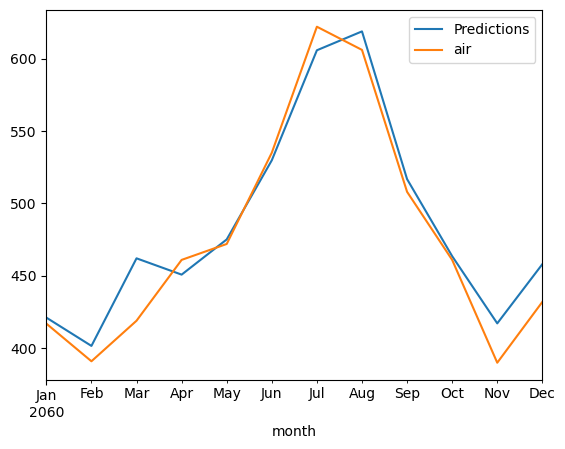

In [18]:
#Plot
predictions.plot(legend = True) 
test['air'].plot(legend = True) 

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
mean_absolute_percentage_error(test['air'],predictions)#mape


3.153215254887548

In [22]:

# Training the model on the full dataset 
model = SARIMAX(airline['air'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, [], 12)) 
result = model.fit() 
  
# Forecast for the next 3 years 
forecast = result.predict(start = len(airline),  
                          end = (len(airline)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 


In [23]:
len(forecast)

36

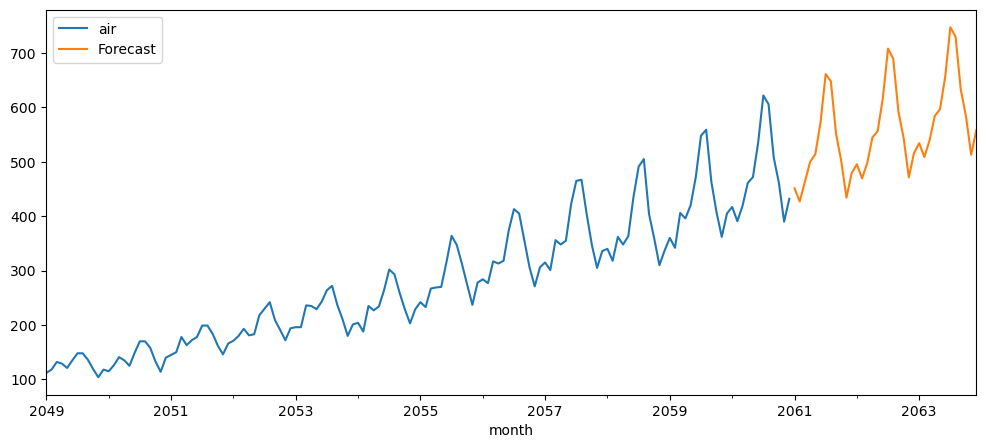

In [24]:
airline['air'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 
plt.savefig("result.png")

In [26]:
forecast.to_csv("susnata_arima.csv")